# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

In [5]:
# city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

In [6]:
# city_weather = requests.get(city_url)

# city_weather



In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city    
    city_url = f"{url}&APPID={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | son la
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | arboletes
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | eceabat
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | ouesso
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | akbarabad
Processing Record 21 of Set 1 | tabora
Processing Record 22 of Set 1

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



In [9]:
# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,13.80,84,100,4.48,ZA,1686516186
1,son la,21.3167,103.9000,21.26,97,98,0.66,VN,1686516249
2,badger,64.8000,-147.5333,18.06,38,40,6.69,US,1686516249
3,arboletes,8.8505,-76.4269,29.93,75,92,3.71,CO,1686516249
4,west island,-12.1568,96.8225,25.99,73,98,10.61,CC,1686516249


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,13.80,84,100,4.48,ZA,1686516186
1,son la,21.3167,103.9000,21.26,97,98,0.66,VN,1686516249
2,badger,64.8000,-147.5333,18.06,38,40,6.69,US,1686516249
3,arboletes,8.8505,-76.4269,29.93,75,92,3.71,CO,1686516249
4,west island,-12.1568,96.8225,25.99,73,98,10.61,CC,1686516249


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

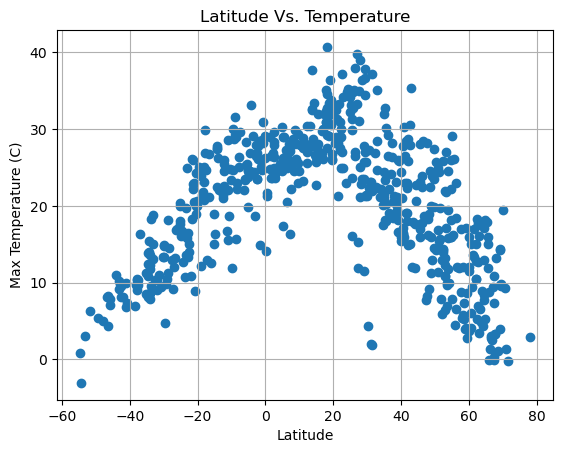

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

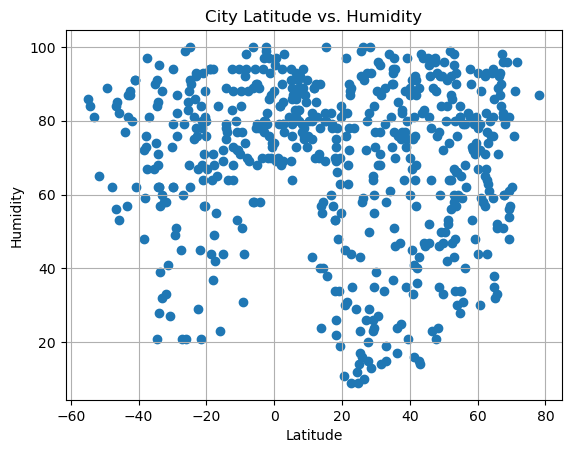

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

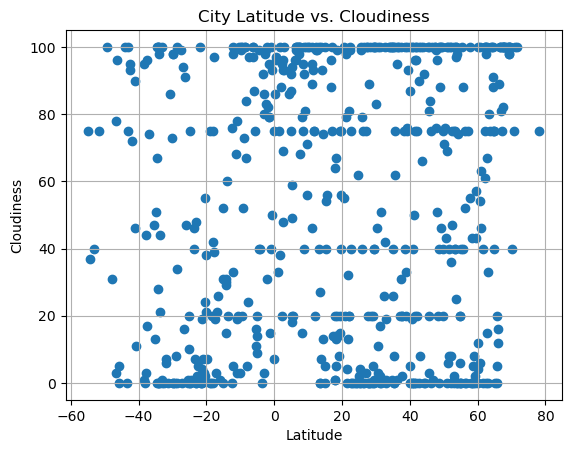

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

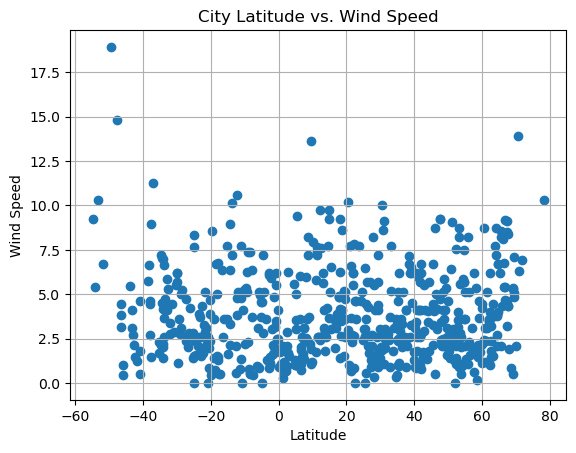

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linger_regression_plot(x,y,title,location):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=18,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df  = city_data_df.loc[(city_data_df['Lat']>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,son la,21.3167,103.9000,21.26,97,98,0.66,VN,1686516249
2,badger,64.8000,-147.5333,18.06,38,40,6.69,US,1686516249
3,arboletes,8.8505,-76.4269,29.93,75,92,3.71,CO,1686516249
6,eceabat,40.1842,26.3574,20.98,60,0,3.09,TR,1686516250
7,albany,42.6001,-73.9662,27.97,43,100,1.73,US,1686516086


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df  = city_data_df.loc[(city_data_df['Lat']< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,13.80,84,100,4.48,ZA,1686516186
4,west island,-12.1568,96.8225,25.99,73,98,10.61,CC,1686516249
5,saldanha,-33.0117,17.9442,13.03,88,100,5.83,ZA,1686516250
8,carnarvon,-24.8667,113.6333,16.11,62,0,8.31,AU,1686516250
11,adamstown,-25.0660,-130.1015,20.31,68,10,7.65,PN,1686516184


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5096014237842723


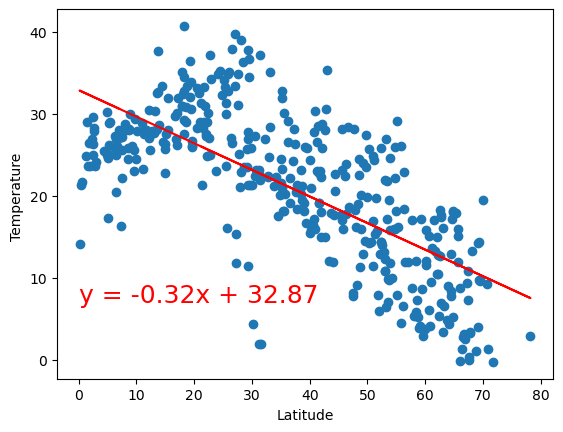

<Figure size 640x480 with 0 Axes>

In [20]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

linger_regression_plot(x, y,"Temperature ", (0,7))

plt.savefig("output_data/Fig5.png")

The r-value is: 0.7265899875189408


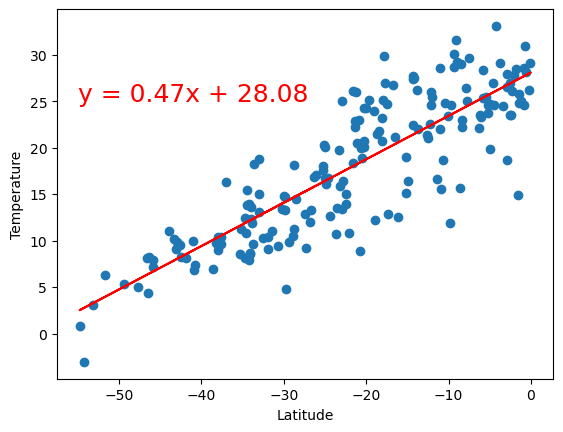

<Figure size 640x480 with 0 Axes>

In [21]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

linger_regression_plot(x, y,"Temperature", (-55,25))
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** Temperature becomes higher the closer the latitude approaches 0

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0022123074300597445


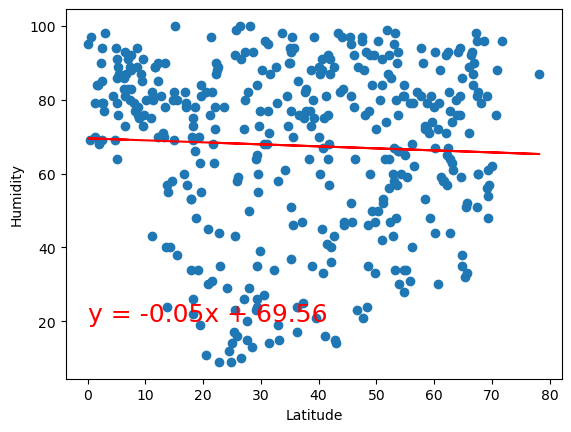

<Figure size 640x480 with 0 Axes>

In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

linger_regression_plot(x, y,"Humidity", (0,20))
plt.savefig("output_data/Fig7.png")

The r-value is: 0.021454147499296614


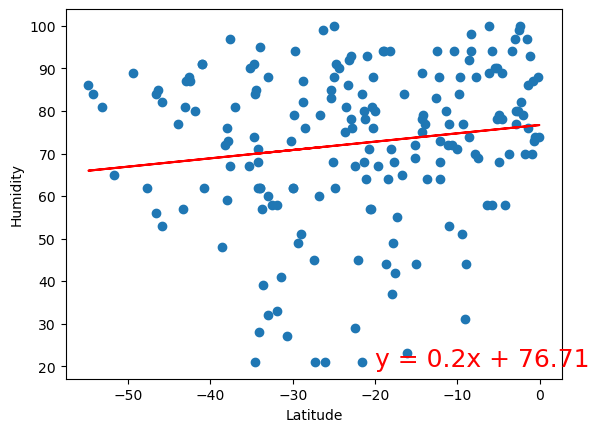

<Figure size 640x480 with 0 Axes>

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

linger_regression_plot(x, y,"Humidity", (-20,20))
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** data very scattered, little correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0013989968513897836


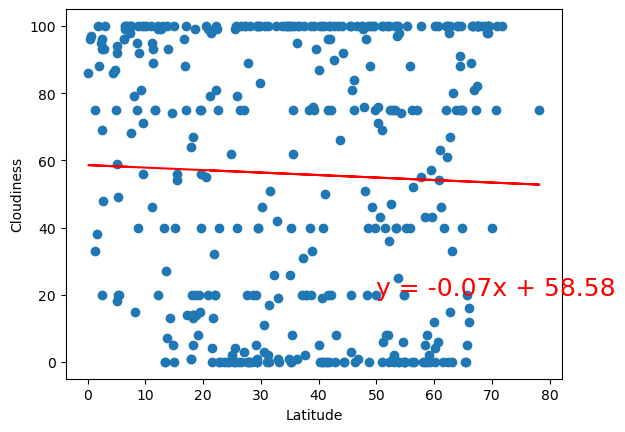

<Figure size 640x480 with 0 Axes>

In [24]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

linger_regression_plot(x, y,"Cloudiness", (50,20))
plt.savefig("output_data/Fig9.png")

The r-value is: 0.007912866544654621


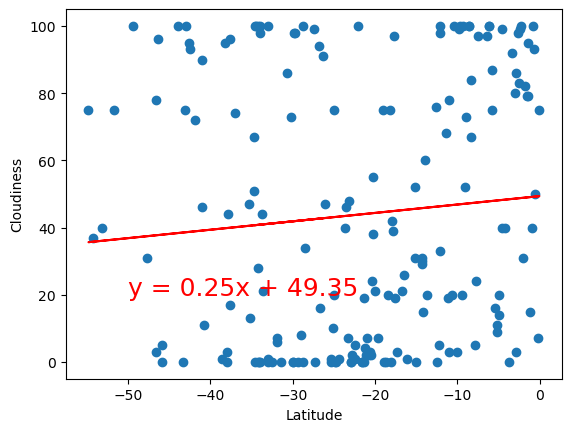

<Figure size 640x480 with 0 Axes>

In [25]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linger_regression_plot(x, y,"Cloudiness", (-50,20))
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** No correlation at all

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012944938208914627


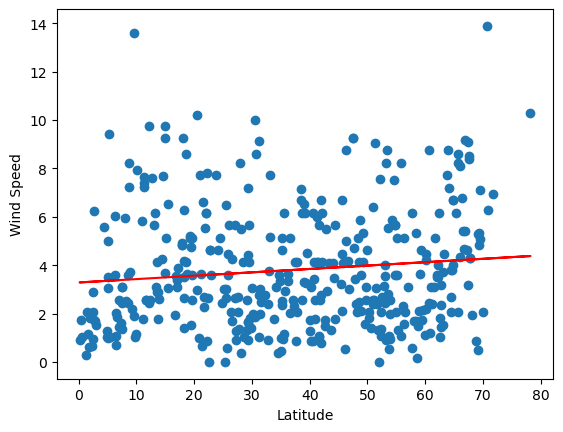

<Figure size 640x480 with 0 Axes>

In [26]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

linger_regression_plot(x, y,"Wind Speed", (10,15))

plt.savefig("output_data/Fig11.png")

The r-value is: 0.038593085239821516


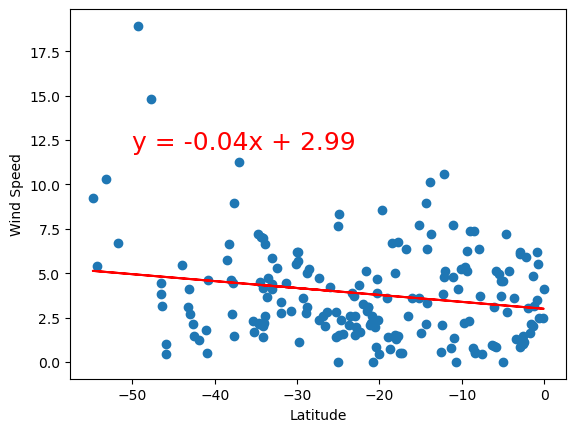

<Figure size 640x480 with 0 Axes>

In [27]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linger_regression_plot(x, y,"Wind Speed", (-50,12))

plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** Seems like wind speed is slower, the closer lat approaches 0